In [ ]:
#Running out of RAM for this notebook? Switch to https://colab.research.google.com/drive/102DccVfLsHo1poAAdUUCisWiDHmeS4Ay?usp=sharing

In [ ]:
#I did find this, but I have literally no clue how to use this:
#https://pytorch.org/vision/main/generated/torchvision.datasets.Flowers102.html
#so I instead decided to tackle building my own image classifier.

In [ ]:
#using this dataset: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset?select=README.md
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yousefmohamed20/oxford-102-flower-dataset")

print("Path to dataset files:", path) #Path is to the most outer folder of the dataset

Path to dataset files: /root/.cache/kagglehub/datasets/yousefmohamed20/oxford-102-flower-dataset/versions/1


In [ ]:
import matplotlib.pyplot as plt
#referncing in class work to test displaying an image:
#https://colab.research.google.com/drive/1_Ez2Kq6HeBRYaomJw8xStLTvORjIZGIi?authuser=2#scrollTo=YJvag3ZgccAg
#in order to check if the dataset can be interacted with

In [ ]:
test_path = "/102 flower/flowers/test/1/image_06743.jpg" #more specific, and to an image, thankfully the same naming as the kaggle page's preview

In [ ]:
testing_path = path + test_path

array([[[ 18,  54,   8],
        [ 16,  52,   6],
        [ 17,  50,   7],
        ...,
        [115, 118, 111],
        [117, 120, 113],
        [120, 123, 116]],

       [[ 21,  54,   9],
        [ 18,  51,   6],
        [ 17,  50,   7],
        ...,
        [125, 130, 123],
        [123, 128, 122],
        [122, 127, 120]],

       [[ 23,  54,  12],
        [ 20,  51,   9],
        [ 18,  49,   8],
        ...,
        [110, 117, 110],
        [114, 120, 116],
        [116, 123, 116]],

       ...,

       [[ 40,  42,  37],
        [ 34,  36,  31],
        [ 26,  28,  23],
        ...,
        [ 12,  14,  11],
        [ 12,  14,  11],
        [ 12,  14,  11]],

       [[ 39,  41,  36],
        [ 33,  35,  30],
        [ 27,  29,  24],
        ...,
        [ 11,  13,  10],
        [ 11,  13,  10],
        [ 11,  13,  10]],

       [[ 35,  38,  31],
        [ 32,  35,  28],
        [ 29,  32,  25],
        ...,
        [ 10,  12,   9],
        [  9,  11,   8],
        [  8,  10,   7]]], dtype=uint8)
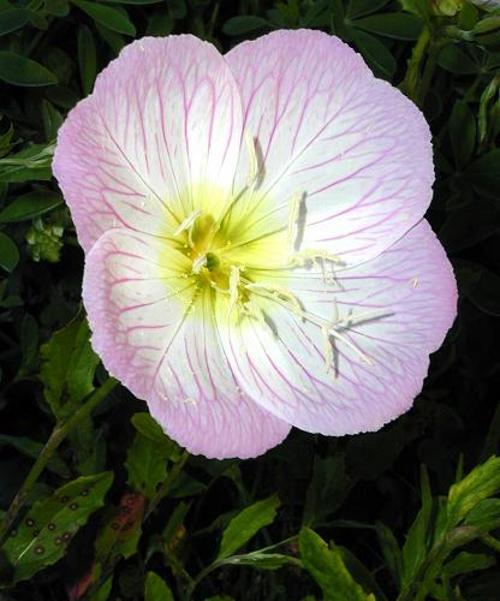

In [ ]:
plt.imread(testing_path) #wanted to see if I can get an image to load, and to test if I am accessing the kaggle dataset.

In [ ]:
import numpy as np

from keras.src.api_export import keras_export
from keras.src.backend.config import standardize_data_format
from keras.src.utils import dataset_utils
from keras.src.utils import image_utils
from keras.src.utils.module_utils import tensorflow as tf #honestly, all this library import stuff is beyond my understanding.

In [ ]:
path #as seen above, brought back for easier refence

'/root/.cache/kagglehub/datasets/yousefmohamed20/oxford-102-flower-dataset/versions/1'

In [ ]:
test_ds_path = path+ "/102 flower/flowers/test" #since the dataset already has the images split up into seperate folders (test, train, and valid),
#I want to try and make seperate data sets of these folders to use as needed in the image classifier.

In [ ]:
test_ds_path

'/root/.cache/kagglehub/datasets/yousefmohamed20/oxford-102-flower-dataset/versions/1/102 flower/flowers/test'

In [ ]:
#referncing #https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function
#to follow along and try and build an image classifer with a custom dataset of images
#Since they're already sorted into groups, I am skipping over seperating out my image dataset from directory into different usable datasets
#as train, test, and valid would be each their own directory pass.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(test_ds_path, labels='inferred')

Found 819 files belonging to 102 classes.


In [ ]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_ds_path = path+ "/102 flower/flowers/train"

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(train_ds_path, labels='inferred')

Found 6552 files belonging to 102 classes.


In [ ]:
valid_ds_path = path+ "/102 flower/flowers/valid"

In [ ]:
valid_ds = keras.utils.image_dataset_from_directory(valid_ds_path, labels='inferred')

Found 818 files belonging to 102 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

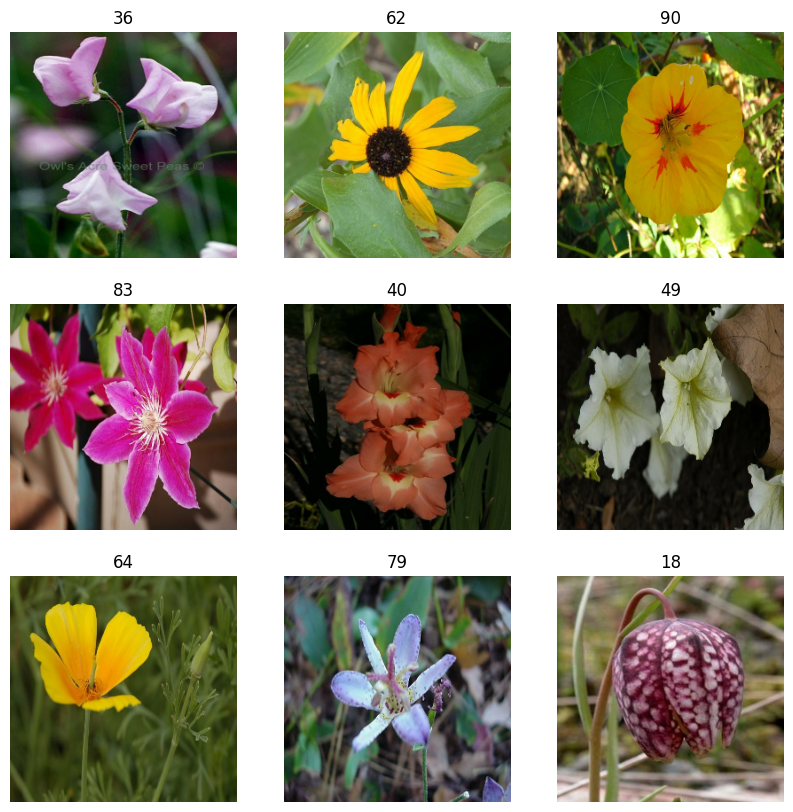

In [ ]:
plt.figure(figsize=(10, 10)) #for some reason I did not expect this to work, huh. I think I previously had an error with the TensorSpec shape? maybe it was because of a different tutorial I was looking at.
for images, labels in train_ds.take(1): # following keras docs: https://keras.io/examples/vision/image_classification_from_scratch/
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
import os

In [ ]:
#https://www.geeksforgeeks.org/os-module-python-examples/
print(os.listdir(test_ds_path)) #76 is correct, 57 is wrong, 92 is wrong, 90 is wrong, 70 is correct, 9 is wrong, 82 is wrong, 92 is wrong, 3 is wrong.

['102', '18', '99', '43', '78', '98', '79', '36', '21', '11', '34', '33', '30', '20', '9', '93', '16', '100', '85', '40', '59', '24', '61', '15', '48', '14', '96', '57', '101', '80', '1', '2', '64', '51', '95', '69', '77', '58', '28', '29', '73', '46', '86', '76', '55', '66', '45', '75', '97', '39', '68', '3', '19', '4', '56', '35', '31', '5', '49', '26', '37', '88', '8', '91', '41', '92', '87', '67', '38', '63', '62', '81', '94', '42', '54', '44', '32', '74', '12', '10', '17', '83', '84', '23', '90', '70', '82', '27', '6', '13', '7', '89', '50', '25', '22', '52', '72', '47', '53', '65', '71', '60']


In [ ]:
#101, X, X
# X, 70, 15
#76, X, X

In [ ]:
classNames = []
classNames = os.listdir(test_ds_path)

In [ ]:
classNames.sort() #sorts the listdir to alphanumeric, same as how image_dataset_from_directory inferrs labels.

In [ ]:
classNames

['1',
 '10',
 '100',
 '101',
 '102',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

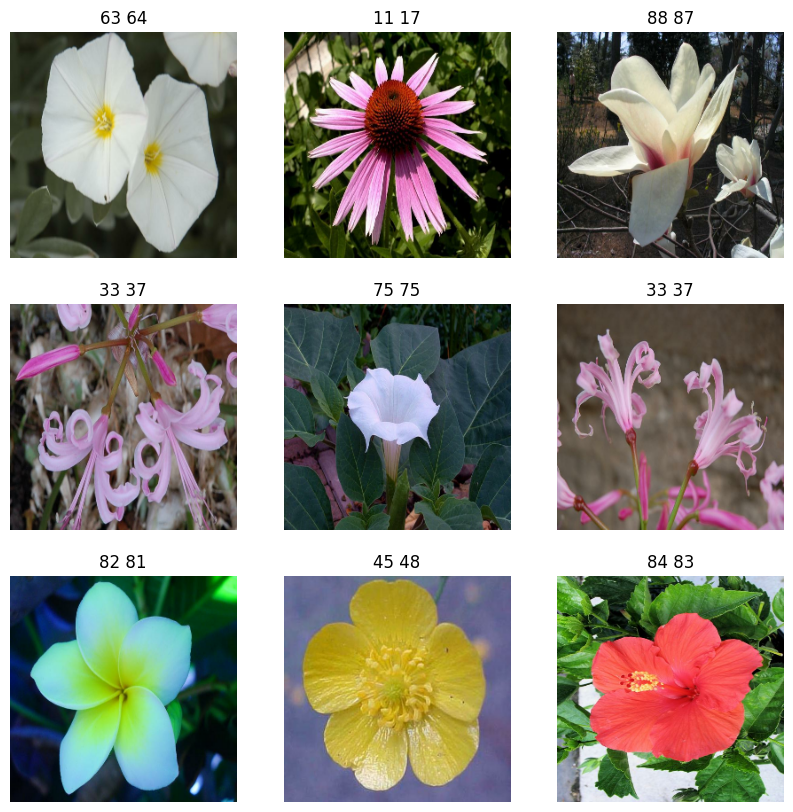

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label = int(labels[i])
    plt.title(str(label)+' '+ classNames[label]) #classNames(label) is correct.
    plt.axis("off")

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(train_ds_path, labels='inferred') #, class_names = classNames) I dont think this really matters then.

Found 6552 files belonging to 102 classes.


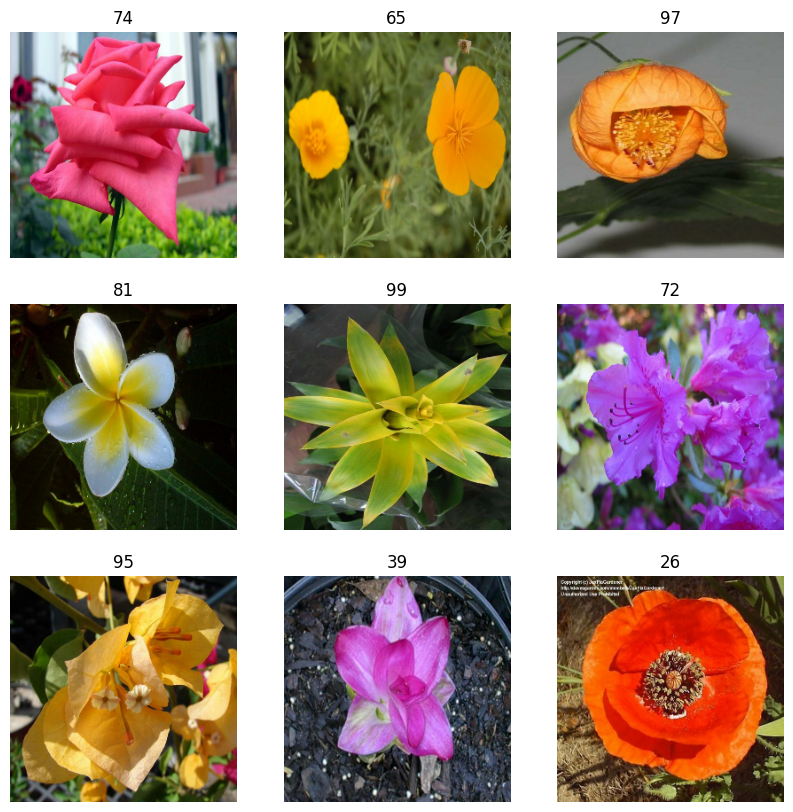

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #label = int(labels[i])
    plt.title(classNames[int(labels[i])]) #I suppose this works?
    plt.axis("off")

In [ ]:
import os
import keras
from keras import layers
from tensorflow import data as tf_data

In [ ]:
data_augmentation_layers = [ #This is good step to keep in, 6552 is not all that high of a number all things considered.
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images): #introduces some more artifical variety into the trainig dataset due to how it applies some transformations to an image
    for layer in data_augmentation_layers: #therefore increasing the amount of training images for the image classifer to use
        images = layer(images)
    return images

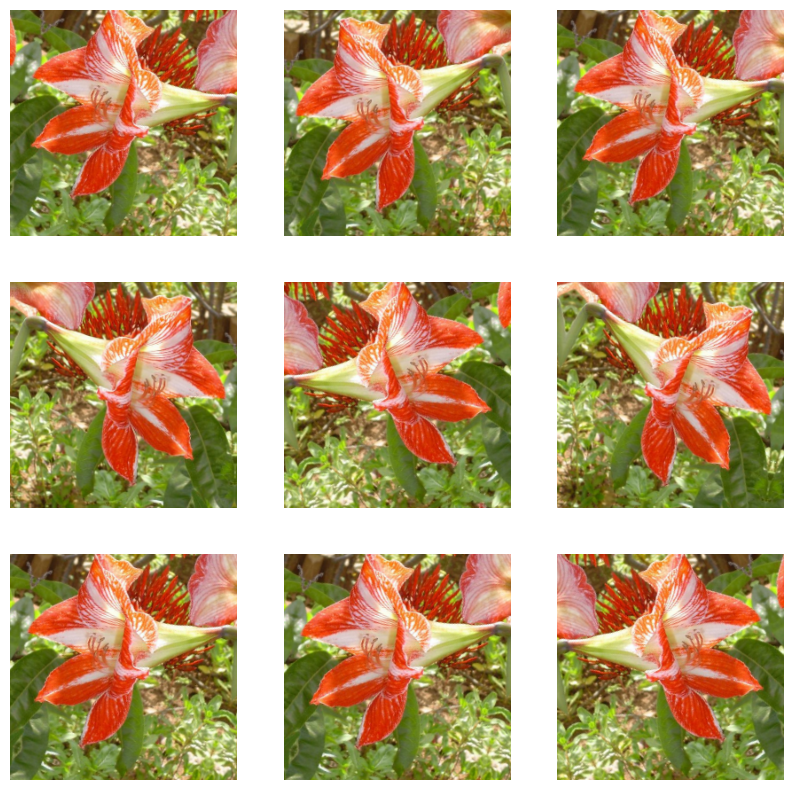

In [ ]:
plt.figure(figsize=(10, 10)) #example look at the data_augmentation at work.
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8")) #only on one image
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y)) #unexpected argument error, so I took out training = true

In [ ]:
augmented_train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

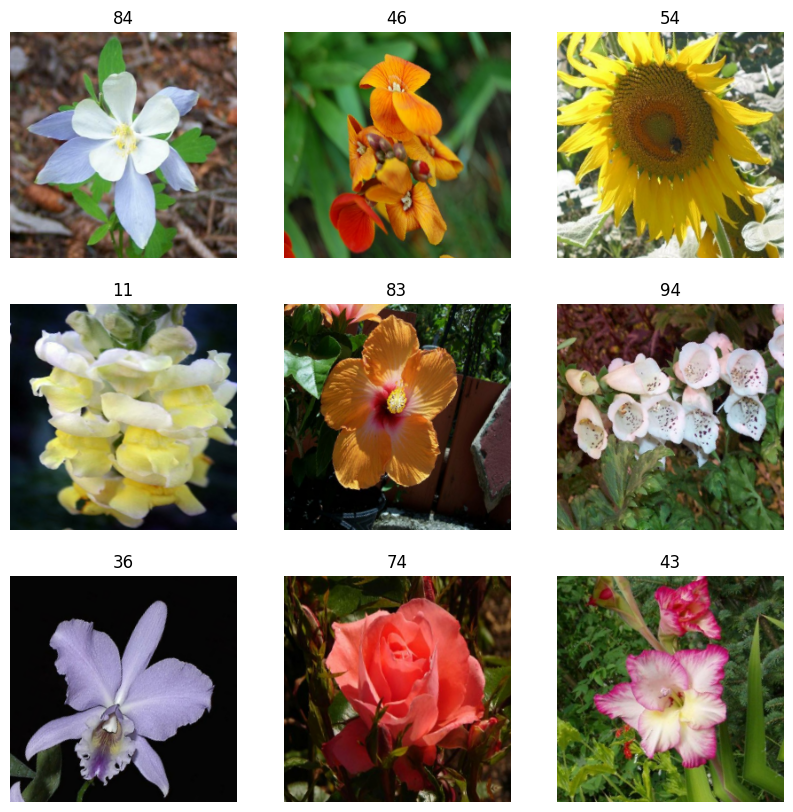

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in augmented_train_ds.take(1): #want to check if the augumentation preprocessing worked? (especially after I took out training=true)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8")) #tested on a range in comparison bc this is reusing the code which initally displayed an assortment of images from the training dataset
        #plt.title(int(labels[i])) #wait, are these numbers wrong? oh no.
        plt.title(classNames[int(labels[i])]) #numbers correct now.
        plt.axis("off")

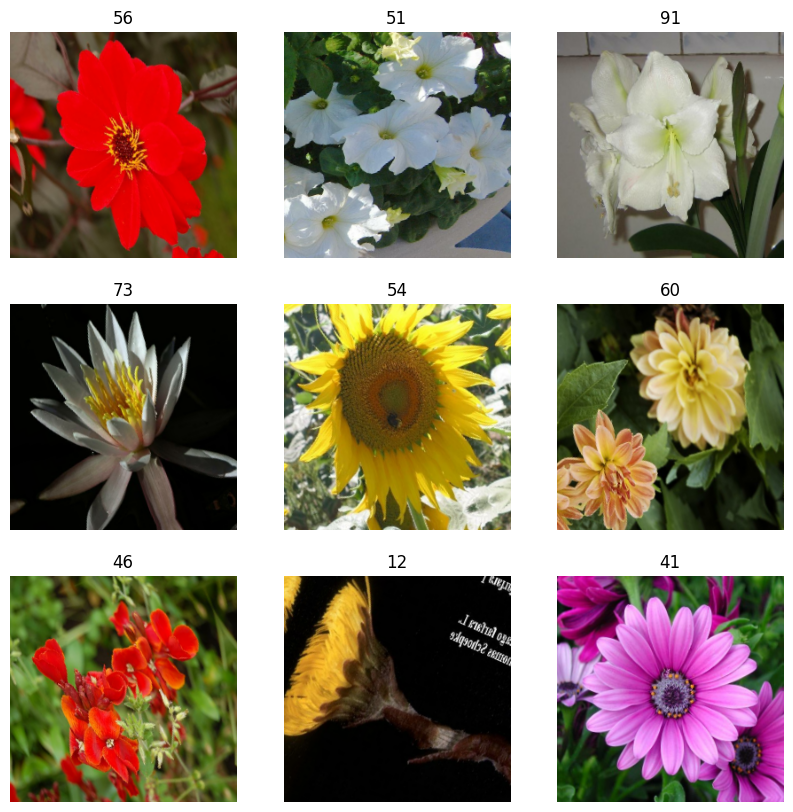

In [ ]:
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y)) #I think, this worked yes.
plt.figure(figsize=(10, 10))
for images, labels in augmented_train_ds.take(1): #want to check if the augumentation preprocessing worked? (especially after I took out training=true)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(classNames[int(labels[i])])
        plt.axis("off")

In [ ]:
#taking these steps from keras, because it improves performance and lesses the strain on the computer

# Apply `data_augmentation` to the training images.
augmented_train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
augmented_train_ds = augmented_train_ds.prefetch(tf_data.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf_data.AUTOTUNE)


In [ ]:
from torch.utils.data import Dataset
import torch
from torch.utils.data import DataLoader

In [ ]:
dataloaders = {
  "train": DataLoader(augmented_train_ds, batch_size=32, shuffle=True),
  "test": DataLoader(test_ds, batch_size=32, shuffle=False),
  "valid": DataLoader(valid_ds, batch_size=32, shuffle=False)
}

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
model = nn.Sequential( #trying out a similar model to this homework: https://colab.research.google.com/drive/1u2nm_Oyv_aSJzjhNbwo0sMad1cfh3B9X?authuser=2#scrollTo=5cxvBjH51Oz1
                      nn.Linear(256, 512),
                      nn.ReLU(),
                      nn.Linear(512, 102), #end with amount of classes to categorize between
                      nn.Softmax()) # instead of Sigmoid

In [ ]:
criterion = nn.CrossEntropyLoss() #Going with cross entropy loss as suggested. https://dilithjay.com/blog/custom-image-classifier-with-pytorch
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
type(dataloaders)

dict

In [ ]:
type(dataloaders["train"]) #".dataloaderDataLoader" ???

torch.utils.data.dataloader.DataLoader

In [ ]:
type(augmented_train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
#ignore this for now, was going to try and see if I could adapt this from class hw.
losses = [] #keep track of losses
for epoch in range(10): #10 iterations to test with?
    for image, labels in augmented_train_ds:
#NOT WORKING, TRY SOMETHING ELSE      estClass = model(image) #passing images into the model (goes through the layers) to be predicted as as a class?
      loss = criterion(estClass,  images.float().unsqueeze(1))
      #these optimizer steps should be fine to leave as is?
      optimizer.zero_grad() #reset the optimizer to prepare for new weights
      loss.backward() #calulates new weights
      optimizer.step() #a single step to update the weights
    losses.append(loss.item()) #documate the amount of loss from this step
    print(f'Epoch: {epoch}, Loss: {losses[epoch]}')

TypeError: linear(): argument 'input' (position 1) must be Tensor, not tensorflow.python.framework.ops.EagerTensor

~~Ignore everything below this line as convoluted and strange:~~

Wait, lemme revisit this. nevermind, I forgot what I wanted to try.
Back to trying stuff again. Nope

In [ ]:
testDirectoryPath = path + "/102 flower/flowers/test"

In [ ]:
# creating dataframes from the 102 oxford dataset,
#help from referencing the first block of code in this article:
#https://rumn.medium.com/custom-pytorch-image-classifier-from-scratch-d7b3c50f9fbe
#could probably be converted to a function def.
import numpy as np
import pandas as pd
import os #https://www.geeksforgeeks.org/python-os-listdir-method/

testImagesPathList = []
testLabelList = []

def createDataFrame (directoryPath, pathList, labelList): #trying to make my own dataframes of the dataset to then convert back into datasets somehow I guess was what I was attempting?
  for classFolder in os.listdir(directoryPath):
    for objects in os.listdir(f"{directoryPath}/{classFolder}"):
      pathList.append(f"{directoryPath}/{classFolder}/{objects}")
      labelList.append(f"{classFolder}")

#for classFolder in os.listdir(testDirectoryPath):
  #for objects in os.listdir(f"{testDirectoryPath}/{classFolder}"):
    #testImagesPathList.append(f"{testDirectoryPath}/{classFolder}/{objects}")
    #testLabelList.append(f"{classFolder}")

createDataFrame(testDirectoryPath, testImagesPathList, testLabelList)

Testdf = pd.DataFrame()

Testdf["image_path"] = testImagesPathList
Testdf["label"] = testLabelList


In [ ]:
#dir_list = os.listdir(directoryPath)

#print("Files and directories in '", directoryPath, "' :")

# print the list
#print(dir_list)

In [ ]:
Testdf.head()

image_path label
0  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
1  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
2  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
3  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
4  /root/.cache/kagglehub/datasets/yousefmohamed2...   102

In [ ]:
Testdf.shape

(819, 2)

In [ ]:
trainDirectoryPath = path + "/102 flower/flowers/train"

In [ ]:
trainImagesPathList = []
trainLabelList = []


createDataFrame(trainDirectoryPath, trainImagesPathList, trainLabelList)


#for classFolder in os.listdir(trainDirectoryPath):
  #for objects in os.listdir(f"{trainDirectoryPath}/{classFolder}"):
    #trainImagesPathList.append(f"{trainDirectoryPath}/{classFolder}/{objects}")
    #trainLabelList.append(f"{classFolder}")

Traindf = pd.DataFrame()

Traindf["image_path"] = trainImagesPathList
Traindf["label"] = trainLabelList

In [ ]:
Traindf.head()

image_path label
0  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
1  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
2  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
3  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
4  /root/.cache/kagglehub/datasets/yousefmohamed2...   102

In [ ]:
Traindf.shape

(6552, 2)

In [ ]:
validDirectoryPath = path + "/102 flower/flowers/valid"

In [ ]:
validImagesPathList = []
validLabelList = []

createDataFrame(validDirectoryPath, validImagesPathList, validLabelList)

#for classFolder in os.listdir(validDirectoryPath):
  #for objects in os.listdir(f"{validDirectoryPath}/{classFolder}"):
    #validImagesPathList.append(f"{validDirectoryPath}/{classFolder}/{objects}")
    #validLabelList.append(f"{classFolder}")

Validdf = pd.DataFrame()

Validdf["image_path"] = validImagesPathList
Validdf["label"] = validLabelList

In [ ]:
Validdf.head()

image_path label
0  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
1  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
2  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
3  /root/.cache/kagglehub/datasets/yousefmohamed2...   102
4  /root/.cache/kagglehub/datasets/yousefmohamed2...   102

In [ ]:
Validdf.shape

(818, 2)

array([[[ 72, 152,  31],
        [ 72, 152,  31],
        [ 72, 154,  30],
        ...,
        [  8,  39,   5],
        [  8,  39,   5],
        [  7,  38,   4]],

       [[ 73, 153,  32],
        [ 73, 153,  32],
        [ 73, 155,  31],
        ...,
        [  7,  38,   4],
        [  7,  38,   4],
        [  7,  38,   4]],

       [[ 74, 154,  33],
        [ 74, 154,  33],
        [ 74, 154,  31],
        ...,
        [  6,  37,   3],
        [  5,  36,   2],
        [  5,  36,   4]],

       ...,

       [[ 80, 167,  28],
        [ 78, 165,  26],
        [ 74, 160,  23],
        ...,
        [ 68, 154,  27],
        [ 68, 154,  27],
        [ 68, 154,  27]],

       [[ 78, 165,  26],
        [ 76, 163,  24],
        [ 73, 159,  22],
        ...,
        [ 68, 154,  27],
        [ 68, 154,  27],
        [ 68, 154,  27]],

       [[ 77, 164,  25],
        [ 75, 162,  23],
        [ 71, 157,  20],
        ...,
        [ 68, 154,  27],
        [ 68, 154,  27],
        [ 68, 154,  27]]], dtype=uint8)
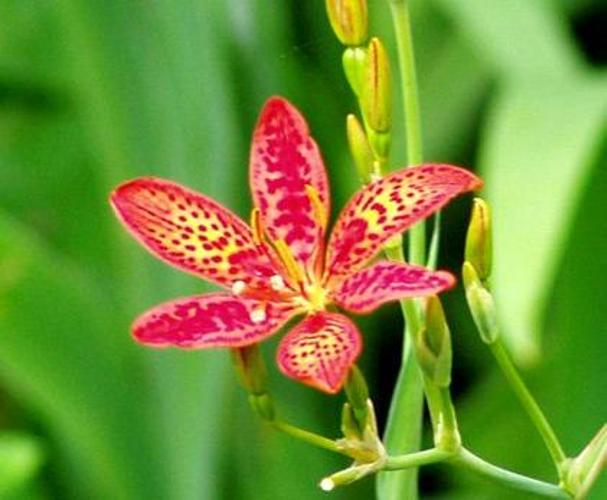

In [ ]:
plt.imread(Testdf.at[0, 'image_path'])

In [ ]:
Testdf.at[0, 'image_path']

'/root/.cache/kagglehub/datasets/yousefmohamed20/oxford-102-flower-dataset/versions/1/102 flower/flowers/test/102/image_08023.jpg'

In [ ]:
test_ndarrays = []
for index in Testdf.iterrows():
  test_ndarrays.append(plt.imread(Testdf.at[0, 'image_path']))

In [ ]:
test_ndarrays

[array([[[ 72, 152,  31],
         [ 72, 152,  31],
         [ 72, 154,  30],
         ...,
         [  8,  39,   5],
         [  8,  39,   5],
         [  7,  38,   4]],
 
        [[ 73, 153,  32],
         [ 73, 153,  32],
         [ 73, 155,  31],
         ...,
         [  7,  38,   4],
         [  7,  38,   4],
         [  7,  38,   4]],
 
        [[ 74, 154,  33],
         [ 74, 154,  33],
         [ 74, 154,  31],
         ...,
         [  6,  37,   3],
         [  5,  36,   2],
         [  5,  36,   4]],
 
        ...,
 
        [[ 80, 167,  28],
         [ 78, 165,  26],
         [ 74, 160,  23],
         ...,
         [ 68, 154,  27],
         [ 68, 154,  27],
         [ 68, 154,  27]],
 
        [[ 78, 165,  26],
         [ 76, 163,  24],
         [ 73, 159,  22],
         ...,
         [ 68, 154,  27],
         [ 68, 154,  27],
         [ 68, 154,  27]],
 
        [[ 77, 164,  25],
         [ 75, 162,  23],
         [ 71, 157,  20],
         ...,
         [ 68, 154,  27],
  

In [ ]:
test_df = pd.DataFrame()

test_df["image_nd_arrays"] = test_ndarrays
test_df["label"] = testLabelList

In [ ]:
test_df.head()

image_nd_arrays label
0  [[[72, 152, 31], [72, 152, 31], [72, 154, 30],...   102
1  [[[72, 152, 31], [72, 152, 31], [72, 154, 30],...   102
2  [[[72, 152, 31], [72, 152, 31], [72, 154, 30],...   102
3  [[[72, 152, 31], [72, 152, 31], [72, 154, 30],...   102
4  [[[72, 152, 31], [72, 152, 31], [72, 154, 30],...   102

In [ ]:
type(test_df.at[0, 'image_nd_arrays'])

numpy.ndarray

In [ ]:
#wanted to see if I could bullheadedly manage to make an image classifer work with nd arrays but I wasn't getting anywhere
#I've come back to this. wait no I forgot what I wanted to try. Back again! Nope.

In [ ]:
train_ndarrays = []
for index in Traindf.iterrows():
  train_ndarrays.append(plt.imread(Traindf.at[0, 'image_path']))

In [ ]:
train_df = pd.DataFrame()

train_df["image_nd_arrays"] = train_ndarrays
train_df["label"] = trainLabelList